# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.


## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.

Импорт базовых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

sns.set_style("darkgrid")

In [2]:
!pip freeze > requirements.txt

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [3]:
data = pd.read_csv(
    "./data/pj6_data.zip", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [4]:
#посмотрим общую информацию по данным
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [5]:
#смотрим на количество строк с пропусками
data.isnull().mean() * data.shape[0]

InvoiceNo           0.0
StockCode           0.0
Description      1454.0
Quantity            0.0
InvoiceDate         0.0
UnitPrice           0.0
CustomerID     135080.0
Country             0.0
dtype: float64

In [6]:
#посмотрим на распределение данных
data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [7]:
#Ищем дубликаты
#список столбцов
dupl_columns = list(data.columns)

#булева маска по дубликатам
mask = data.duplicated(subset=dupl_columns)

#Фильтруем по дубликатам
data_duplicates = data[mask]
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')


Число найденных дубликатов: 5268


In [8]:
#Cколько уникальных клиентов совершали транзакции в указанный период
print(f'Количество уникальных клиентов: {data["CustomerID"].value_counts().shape[0]}')


Количество уникальных клиентов: 4372


In [9]:
# Из каких стран совершались транзакции

print(f'Количество стран совершения операций: {data["Country"].value_counts().shape[0]}')
# Всего 38 стран совершения операций

# Из всех стран на ТОП-5 стран приходится 96.74 % от всех операций

print(f'Из всех стран на ТОП-5 стран приходится {(data["Country"].value_counts().iloc[0:5] / data.shape[0] * 100).round(2).sum().round(2)} % от всех операций')
print((data["Country"].value_counts().iloc[0:5] / data.shape[0] * 100).round(2))

# Это страны United Kingdom, Germany, France, EIRE, Spain

Количество стран совершения операций: 38
Из всех стран на ТОП-5 стран приходится 96.74 % от всех операций
United Kingdom    91.43
Germany            1.75
France             1.58
EIRE               1.51
Spain              0.47
Name: Country, dtype: float64


In [10]:
# перевод столбцов в формат даты
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


## Выводы:
1. Всего строк в данных - 541909. Там сразу видны пропуски. Все данные кроме количества и цены являются текстовыми данным.
2. По первоначальному анализу пропуски есть в столбцах `Description` (1454 строки) и `CustomerID` (135080 строк)
3. При оценке распределения числовых признаков выявлено отрицательно значение. Это не является ошибкой, а свидетельствует о возврате товара, но также может означать скидки.
4. Число найденных полных дубликатов (по т.е. совпадение по всем столбцам) - 5268 шт.
5. Количество уникальных клиентов - 4372
6. Всего 38 стран совершения операций. Из всех стран на ТОП-5 стран приходится 96.74 % от всех операций. Это страны United Kingdom, Germany, France, EIRE, Spain

## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [11]:
#удаляем строки с пропусками данных
drop_data = data.dropna(how='any', axis=0)

#смотрим результат
drop_data.isnull().mean()

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [12]:
#данные проверялись на наличие дубликатов выше
#сейчас прверим обновленное количество дубликатов после очистки от пропусков

mask = drop_data.duplicated(subset=dupl_columns)
data_duplicates = drop_data[mask]
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')

#очищаем от дубликатов
data_dedupped = drop_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {data_dedupped.shape[0]}')

#Число найденных дубликатов: 5225
#Результирующее число записей: 401604

Число найденных дубликатов: 5225
Результирующее число записей: 401604


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [13]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [14]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data_dedupped['QuantityCanceled'] = get_quantity_canceled(data_dedupped)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.

In [15]:
#Cколько транзакций в данных не имеют контрагентов
print(f"Количество транзакций без контрагентов - {data_dedupped['QuantityCanceled'].isna().mean()*data_dedupped.shape[0]}")

#Количество транзакций без контрагентов - 1303. Их немного по сравнению с общим количеством строк (401604), поэтому можно их удалить.
data_cleared = data_dedupped[data_dedupped['QuantityCanceled'].isna()==False]

#Удалим транзакции с отрицательным количеством товара
print(f"Количество транзакций с отрицательным количество товарва - {data_cleared[data_cleared['Quantity']<0].shape[0]}")
data_cleared = data_cleared[data_cleared['Quantity']>=0]

#Итоговая размерность данных
print(f"Размерность таблицы после обработки - {data_cleared.shape}")

#Количество транзакций без контрагентов - 1303.0
#Количество транзакций с отрицательным количество товарва - 7569
#Размерность таблицы после обработки - (392732, 9)


Количество транзакций без контрагентов - 1303.0
Количество транзакций с отрицательным количество товарва - 7569
Размерность таблицы после обработки - (392732, 9)


#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [16]:
# регулярное выражение для нахождения региона в title
regex_new = '^[a-zA-Z]+'

#применяем индикаторный столбец
data_cleared['special'] = data_cleared['StockCode'].str.findall(regex_new).astype('str')
print(f"Количество специальных транзакций - {data_cleared[data_cleared['special']!='[]'].shape[0]}")

#очищаем (вместе с индикаторным столбцом)
data_cleared_special = data_cleared[data_cleared['special']=='[]'].drop(['special'], axis=1)

#Итоговая размерность данных
print(f"Размерность таблицы после обработки - {data_cleared_special.shape}")

#Количество специальных транзакций - 1549
#Размерность таблицы после обработки - (391183, 9)

Количество специальных транзакций - 1549
Размерность таблицы после обработки - (391183, 9)


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [17]:
#определяем количество транзакций
print(f"Количество транзакций с нулевой стоимостью товаров - {data_cleared_special[data_cleared_special['UnitPrice']==0].shape[0]}")

#очищаем
data_cleared_goods = data_cleared_special[data_cleared_special['UnitPrice']!=0]

#Итоговая размерность данных
print(f"Размерность таблицы после обработки - {data_cleared_goods.shape}")

#Количество транзакций с нулевой стоимостью товаров - 33
#Размерность таблицы после обработки - (391150, 9)

Количество транзакций с нулевой стоимостью товаров - 33
Размерность таблицы после обработки - (391150, 9)


#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [18]:
data_cleared_goods['TotalPrice'] = data_cleared_goods['UnitPrice'] * (data_cleared_goods['Quantity'] - data_cleared_goods['QuantityCanceled'])
result_data = data_cleared_goods

Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


#### Выводы:
1. Изначальное количество транзакций - 541909
2. Убраны транзакции с пропусками - 135080
3. Убраны дубликаты - 5225
4. Убраны транзакции без контрагентов - 1303
5. Убраны транзакции с отрицательным количество товарва - 7569
6. Убраны специальные транзакции - 1549
7. Убраны транзакции с нулевой ценой товаров - 33
8. Итогововая размерность данных - (391150, 10)

### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.

In [19]:
# Клиенты из каких стран покупают больше и чаще
# сгруппируем таблицу по признаку страны и посчитаем среднюю сумму покупок на одного клиента из соответствующей страны, а также количество покупок на одного клиента из соответствуюшей страны

# сначала группируем по стране и по покупателю (вывод количества транзакций и суммы всех транзакций по покупателю)
temp_df = result_data.groupby(by=['Country','CustomerID'])['TotalPrice'].agg(['count', 'sum'])

#группируем по стране, учитываем среднее по покупателям
temp_df =  temp_df.groupby(by=['Country'])[['count','sum']].agg(['mean'])

#средняя величина транзакции по покупателям в стране
temp_df['value'] = temp_df['sum'] / temp_df['count']

temp_df.columns = ['count', 'sum' ,'value']

Text(0.5, 1.0, 'Суммарная стоимость одной покупки у одного покупателя')

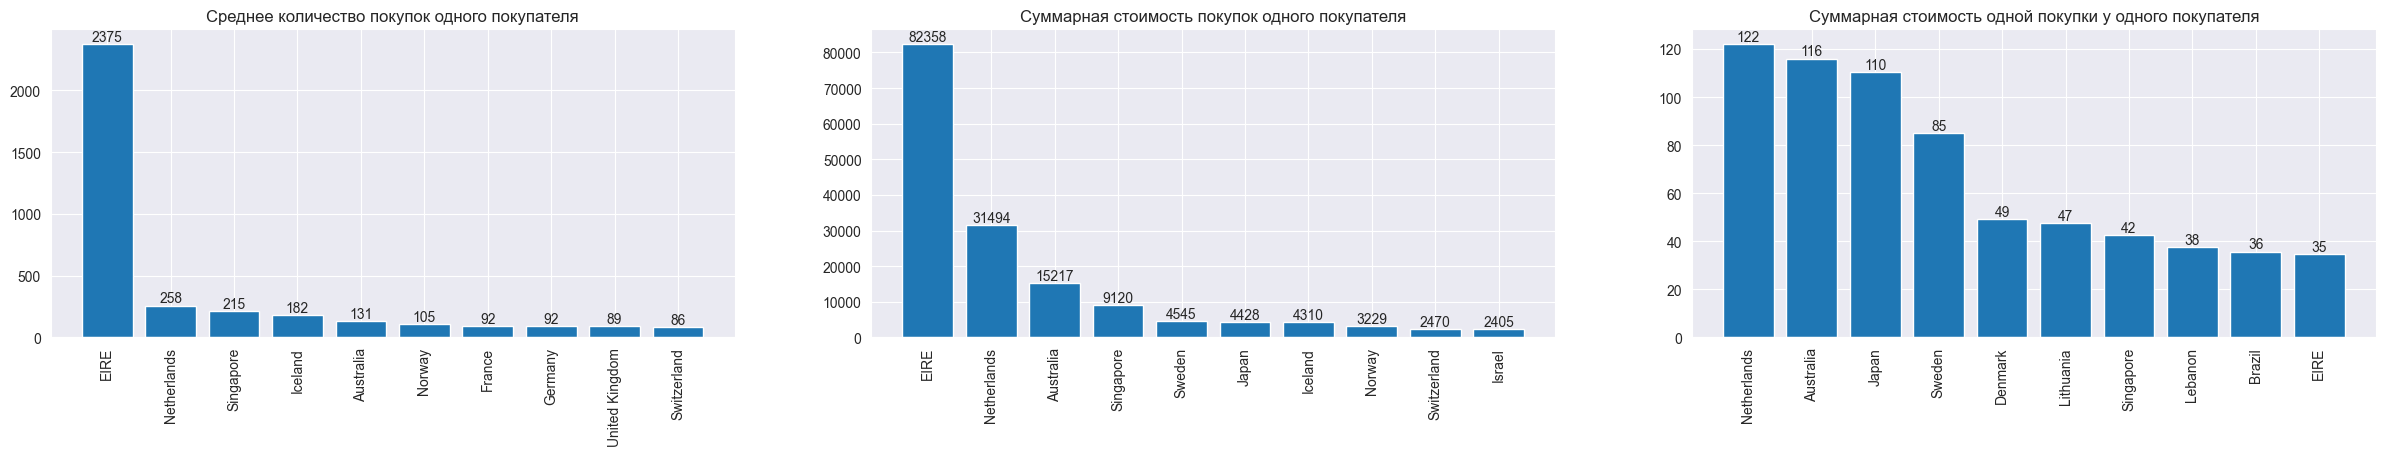

In [20]:
#графики
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 4))

for i, type in enumerate(['count', 'sum', 'value']):
    bar1 = axes[i].bar(
        x=temp_df.sort_values(by=type, ascending=False).nlargest(n=10, columns=type).index,
        height=temp_df.sort_values(by=type, ascending=False).nlargest(n=10, columns=type)[type],
    )
    axes[i].xaxis.set_tick_params(rotation=90)
    axes[i].bar_label(bar1, fmt='%.0f')
    
    
axes[0].set_title("Cреднее количество покупок одного покупателя")
axes[1].set_title("Суммарная стоимость покупок одного покупателя")
axes[2].set_title("Суммарная стоимость одной покупки у одного покупателя")

#### Выводы:
1. Больше всего покупают клиенты из `EIRE`. У клиентов из этой страны самая высокая суммарная стоимость покупок на одного уникального покупателя. Это связано с тем, что из этой страны покупки осуществляют всего три покупателя (см. таблицу ниже), которые осуществляют много транзакций.
2. Также клиенты из этой страны чаще других осуществляют покупки (среднее количество транзакций сильно выше, чем в других странах)
3. Если же рассматривать вариант со средней величиной одной транзакции в расчете на одного уникального покупателя, то тут лидерство у клиентов из `Netherlands`. Они также занимают второе место по количеству покупок на одного покупателя и суммарной стоимости покупок на одного покупателя. В данном случае это также связано с тем, что количество клиентов из этой страны всего 9 (см. таблицу ниже).
4. В целом исходные данные не достаточно сбалансированы, что связано с особенностями деятельности самой компании, предоставившей данные (она базируется в Великобритании, занимается онлайн-розничной торговлей, в основном продает уникальные подарки на все случаи жизни, а многие клиенты компании являются оптовиками). Поэтому в данных получилось большое количество клиентов с небольшими заказами из самой страны компании и малое количество клиентов из стран EC c большими закупками в расчёте на одного покупателя.

In [21]:
#таблица с количеством уникальных клиентов из стран
result_data.groupby(by=['Country'])['CustomerID'].agg(['nunique']).sort_values(by='nunique',ascending=False)

,nunique
Country,
United Kingdom,3916
Germany,94
France,87
Spain,30
Belgium,25
Switzerland,21
Portugal,19
Italy,14
Finland,12


Text(0.5, 0, 'Номер месяца')

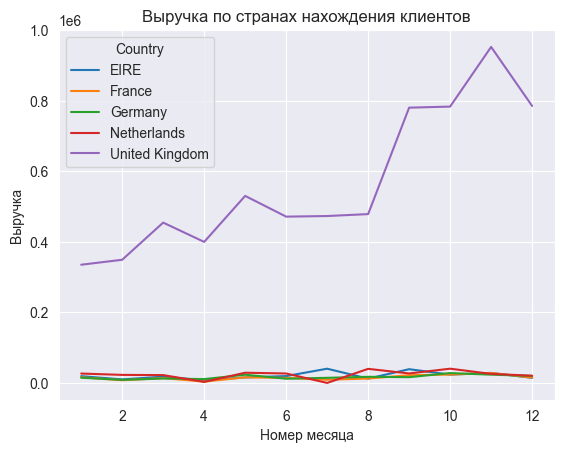

In [22]:
#Какие страны приносят наибольшую сезонную выручку

#Т.к. стран много и в графическом виде их не очень удобно отображать, то выберем топ-5 стран по признаку 'TotalPrice'
temp_df = result_data
temp_df = temp_df.groupby(by=['Country'], as_index=True)['TotalPrice'].agg(['sum']).round()
temp_df = temp_df.sort_values(by=['sum'], ascending=False)

top = list(temp_df.iloc[0:5].index)
# ТОП-5 стран - 'United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France'

#Далее выделим сумму покупок клиентами из соответствующей страны по месяцам
temp_df = result_data
temp_df['month']= result_data['InvoiceDate'].dt.month
temp_df = temp_df[['month','Country', 'TotalPrice']]
temp_df = temp_df[(temp_df['Country'] == top[0])|(temp_df['Country'] == top[1])|(temp_df['Country'] == top[2])|(temp_df['Country'] == top[3])|(temp_df['Country'] == top[4])].groupby(by=['month','Country'], as_index=False)['TotalPrice'].agg(['sum']).round()

line1 = sns.lineplot(data=temp_df, x="month", y='sum', hue='Country')

line1.set_title("Выручка по странах нахождения клиентов")
line1.set_ylabel('Выручка')
line1.set_xlabel('Номер месяца')

#### Выводы:
1. Наибольшую сезонную выручку приносят клиенты из `United Kingdom`. Это связано с тем, что компания расположена в Великобритании.
2. Ближайшие четыре страны `Netherlands`, `EIRE`, `Germany`, `France` уже сильно отстают от лидера и в целом показывают стабильные объемы покупки в течение года.
3. Если рассматривать сезонность по лидеру, то значительный отметить значенительный объем в конце года и спад в начале год (вероятно сильно влияет - наступление Нового года и Рождества), а также небольшие всплески в марте (день Матери, день Содружества, день Святого Патрика), мае (Банковские каникулы), сентябре (Праздник Урожая (День Благодарения)), октябре-ноябре (Хэллоуин)

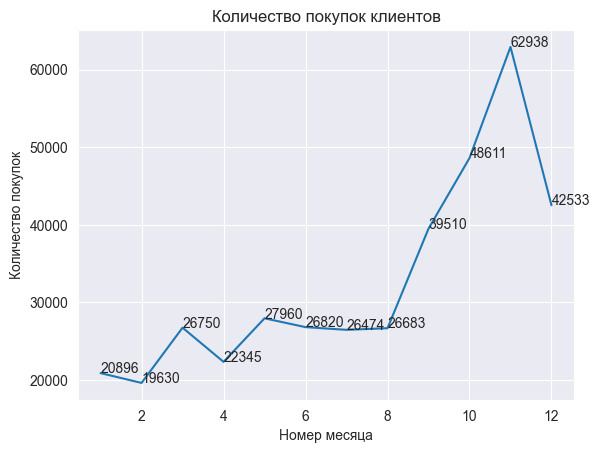

In [23]:
#Присутствует ли в продажах сезонность (когда покупают чаще)
#Теперь посмотрим есть ли сезонность по частоте покупоку среди всех покупателей вне зависимости от страны

temp_df = result_data
temp_df['month']= result_data['InvoiceDate'].dt.month
temp_df = temp_df['month'].value_counts()
temp_df

line2 = sns.lineplot(data=temp_df, x=temp_df.index, y=temp_df.values)

line2.set_title("Количество покупок клиентов")
line2.set_ylabel('Количество покупок')
line2.set_xlabel('Номер месяца')

for i, txt in enumerate(list(temp_df.values)):
    line2.text(temp_df.index[i], temp_df.values[i], txt)

#### Выводы:
1. Сезонность присутствует. Если рассматривать сезонность по количеству покупок, то чаще всего покупают в конце года (ноябрь-декабрь - наступление Нового года и Рождества, Хэллоуин) с резким спадом в начале года ("подарки уже не требуются")
2. Также учитывая, что большинство клиентов из Великобритании, то на сезонность влияют праздники, характерные для конкретной страны - в марте (день Матери, день Содружества, день Святого Патрика), мае (Банковские каникулы), сентябре (Праздник Урожая (День Благодарения)).

Text(50.722222222222214, 0.5, 'Час дня')

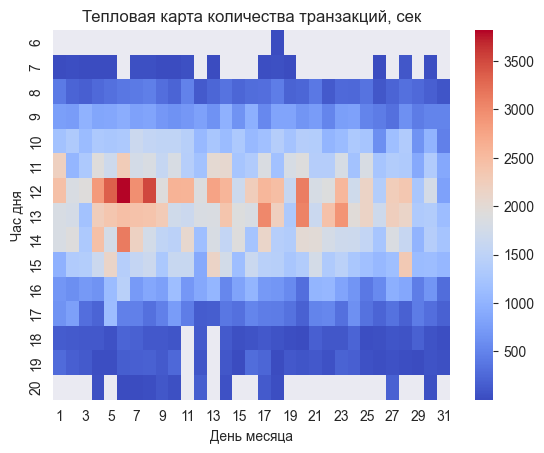

In [24]:
#Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.

#Скопируем данные, добавим столбцы, сделаем сводную таблицу
temp_df = result_data
temp_df['day']= result_data['InvoiceDate'].dt.day
temp_df['hour']= result_data['InvoiceDate'].dt.hour


pivot = temp_df.pivot_table(
    values='TotalPrice',
    index='hour',
    columns='day',
    aggfunc='count'
)

#делаем тепловую карту
heat = sns.heatmap(pivot, cmap = 'coolwarm')

heat.set_title('Тепловая карта количества транзакций, сек')
heat.set_xlabel('День месяца')
heat.set_ylabel('Час дня')


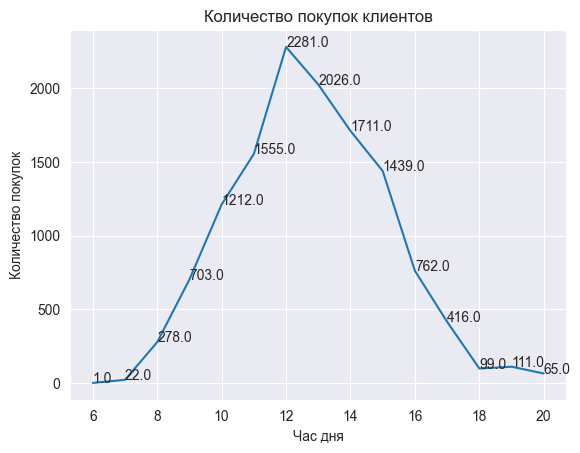

In [25]:
#Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.

pivot1 = pivot.T.mean().round()
pivot1

line3 = sns.lineplot(data=pivot1, x=pivot1.index, y=pivot1.values)

line3.set_title("Количество покупок клиентов")
line3.set_ylabel('Количество покупок')
line3.set_xlabel('Час дня')

for i, txt in enumerate(list(pivot1.values)):
    line3.text(pivot1.index[i], pivot1.values[i], txt)


In [26]:
#Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

#По форме графика (колокол) похоже на нормальное распределение. Проверим

H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'
alpha = 0.05


#Проверим по тесту Шапиро-Уилка
from scipy.stats import shapiro

_, p = shapiro(pivot1)
print('p=%.3f' % p)

# Интерпретация 
if p > alpha:
	print(H0)
else:
	print(Ha)

#p=0.061
#Данные распределены нормально


p=0.061
Данные распределены нормально


#### Выводы:
1. По результатам анализа тепловой карты видно, что больше всего покупок совершается в середине дня (с 11 до 13 часов), а также в начале месяца (с 4 по 10 число)
2. Если рассматривать только часы совершения покупок, то день месяца влияет слабо: больше всего покупок совершается также с 11 до 13 часов, меньше всего с 18 вечера до 7 утра.
3. Распределение количества покупок по часам дня соответствует нормальном распределению. Тест Шапиро-Уилка это подтверждает.

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=data/rfm_model.png align="center" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между точкой отсчёта и датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [88]:
#группируем
rfm_table = result_data
rfm_table = result_data.groupby(by=['CustomerID']).agg({'InvoiceDate': 'max','CustomerID':'count','TotalPrice':'sum'})

#считаем столбец 'Recency'
delta_days = pd.to_datetime('2011-12-10 00:00:00') - rfm_table['InvoiceDate']
rfm_table['Recency'] = delta_days.dt.days

#переименовываем столбцы, убираем лишние
rfm_table.columns = ['InvoiceDate', 'Frequency', 'Monetary','Recency']
rfm_table = rfm_table.drop(['InvoiceDate'], axis=1)
rfm_table

,Frequency,Monetary,Recency
CustomerID,,,
12346,1,0.00,325
12347,182,4310.00,2
12348,27,1437.24,75
12349,72,1457.55,18
12350,16,294.40,310
...,...,...,...
18280,10,180.60,277
18281,7,80.82,180
18282,12,176.60,7


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [89]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Frequency", "Monetary", "Recency"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
fig.write_html('data/boxplot_1.html')
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 200 штук), а также клиенты, общая стоимость заказов которых превышает 100 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [90]:
#Пишем фукнцию по выбросам
def outliers_95(data, features):
    '''
    Функция принимает на вход df и перечень признаков,
    выдает df выбросов и очищенный df после прохохждения до границы 95% по каждому из признаков
    '''
    x = data[features]
    upper_bound = x.quantile(0.95)
    
    outliers = pd.DataFrame()
    
    for i in features:
        y = data[i]
        outliers_add = data[y > upper_bound[i]]
        if outliers.empty:
            outliers = outliers_add
        
        # добавляем недостающие выбросы из следующего признака
        for k in outliers_add.index:
            outliers.loc[k] = [outliers_add[j].loc[k] for j in outliers_add.columns]
        
    
    outliers_result = outliers
    cleaned_result = data[~(data.isin(outliers_result).all(axis=1))]
    
    return outliers_result, cleaned_result


outliers, cleaned_rfm = outliers_95(rfm_table, features = ['Frequency','Monetary'])
print(f'Число выбросов: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned_rfm.shape[0]}')

#Число выбросов: 326
#Результирующее число записей: 4008

Число выбросов: 326
Результирующее число записей: 4008


In [91]:
#посмотрим на изменение после очистки
hist = [px.histogram(cleaned_rfm, x=column, marginal='box') for column in cleaned_rfm.columns]
fig = make_subplots(
    rows=2, cols=3, 
    subplot_titles=(
        "Frequency", "Monetary", "Recency"
    )
)

for i, box in enumerate(hist):
    fig.add_trace(hist[i]['data'][0], row=2, col=i+1)
    fig.add_trace(hist[i]['data'][1], row=1, col=i+1)
    
fig.update_layout(showlegend=True)
fig.write_html('data/boxplot_histplot_cleaned.html')
fig.show()

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [70]:

#Сначала нормализуем, потом стандартизируем. Сначала делаем нормализацию трёх признаков. Затем стандартизируем эти же все три признака. Всё делаем в трансформере

ct_norm = make_column_transformer((Normalizer(), ["Frequency", "Monetary", "Recency"]), remainder='passthrough')
ct_st = make_column_transformer((StandardScaler(),[0,1,2]))
          
#Формируем pipeline
# С помощью PCA уменьшаем размерность до двух признаков
pipe = Pipeline([('ct_norm', ct_norm), 
                 ('ct_st', ct_st),
                 ('pca', PCA(n_components=2))
                 ])

rfm_pipe = pipe.fit_transform(cleaned_rfm)

rfm_pipe.shape

(4008, 2)

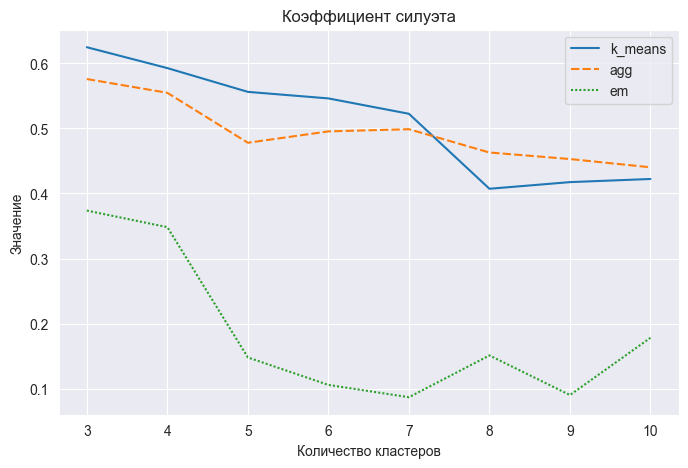

In [113]:
# Кластеризуем

#напишем функцию
def cluster_func(df=rfm_pipe, cluster_list=list(range(3,11))):

    #делаем изначальный df
    silhouette_alg_scores = pd.DataFrame(index = cluster_list)
    algos = [0, 1, 2]
    silhouette_alg_scores[algos] = 0

    #cчитаем коэффициент силуэта для каждого алгоритма и количеста кластеров
    for clust_num in silhouette_alg_scores.index:
        #1 алгоритм KMeans
        k_means =  KMeans(n_clusters=clust_num, random_state=42)
    
        #2 Агломеративная кластеризация
        agg = AgglomerativeClustering(n_clusters=clust_num)

        #3 EM-алгоритм
        em = GaussianMixture(n_components=clust_num, random_state=42)
    
        algs = [k_means, agg,  em]
        temp_df = {}

        for i, algs in enumerate(algs):
            algs.fit(df)
            if algs!=em:
                temp_df[i] = silhouette_score(df, algs.labels_)
            else:
                temp_df[i] = silhouette_score(df, algs.predict(df))
    
        silhouette_alg_scores = silhouette_alg_scores.append(temp_df, ignore_index = True)


    #преобразуем полученный df    
    silhouette_alg_scores = silhouette_alg_scores[silhouette_alg_scores[0]!=0]
    silhouette_alg_scores.index = cluster_list
    silhouette_alg_scores.columns = ['k_means', 'agg',  'em']

    #выводим графики коэффициентов силуэта для каждого алгоритма
    fig = plt.figure(figsize=(8, 5))
    line4 = sns.lineplot(
    data=silhouette_alg_scores
    )

    line4.set_title("Коэффициент силуэта")
    line4.set_ylabel('Значение')
    line4.set_xlabel('Количество кластеров')

#выводим
cluster_func(df=rfm_pipe, cluster_list=list(range(3,11)))

#### Выводы:
1. Наилучшие значения коэффициента силуэта достигаются при количестве кластеров, равном 3
2. Наилучший алгоритм - `KMeans`

In [50]:
#Предсказание меток кластеров
#инициируем алгоритм
k_means3 =  KMeans(n_clusters=3, random_state=42)


#Копируем очищенный df c тремя признаками, добавляем метки классов
rfm_predicted = cleaned_rfm
rfm_predicted['cluster'] = k_means3.fit(rfm_pipe).labels_
rfm_predicted['cluster'] = rfm_predicted['cluster']+1
rfm_predicted

,Frequency,Monetary,Recency,cluster
CustomerID,,,,
12346,1,0.00,325,2
12347,182,4310.00,2,1
12348,27,1437.24,75,1
12349,72,1457.55,18,1
12350,16,294.40,310,2
...,...,...,...,...
18278,9,173.90,73,1
18280,10,180.60,277,2
18281,7,80.82,180,2


### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

In [51]:
#Используем plotly express, чтобы покрутить его и рассмотреть кластеры

fig = px.scatter_3d(
    data_frame=rfm_predicted, 
    x = 'Frequency', 
    y = 'Monetary', 
    z = 'Recency', 
    color='cluster', 
    width=1000,
    height=700
)
    
fig.update_layout(showlegend=True)
fig.write_html('data/cluster_scatterplot.html')
fig.show()

#### Выводы:
1. На графике изображены 3 кластера:
* Кластер 1 (тёмно-синий цвет) - имеет показатели: `Recency` - большая часть от 0 до 150, `Monetary` - в основном от 1000 до 5000, `Frequency` - большая часть  от 0 до 150, 
* Кластер 2 (фиолетовый цвет) - имеет показатели: `Recency` - от 0 до 350, `Monetary` - в основном от 0 до 500, `Frequency` - в основном от 0 до 100, 
* Кластер 3 (жёлтый цвет) - имеет показатели: `Recency` - большая часть от 0 до 150, `Monetary` - в основном от 0 до 1000, `Frequency` - в основном от 0 до 300 (но большая часть от 0 до 150)

1. Основные ключевые характеристики кластеров:
* Кластер 1 (тёмно-синий цвет) - склонны тратить больше всех, количество покупок может быть и большим и малым, от последней покупки прошло мало времени (т.е. это могут быть и "лояльные", и "новички", совершившие недавно крупные покупки)
* Кластер 2 (фиолетовый цвет) - склонны тратить меньше всех, количество покупок меньше всех, от последней покупки может пройти как много, так и мало времени (т.е. это могут быть и "новички", и "спящие")
* Кластер 3 (жёлтый цвет) - умеренная величина расходов, количество покупок может быть и большим и малым, от последней покупки прошло мало времени (т.е. это могут быть и "перспективные", и "новички", совершившие недавно покупки)

Для однозначной классификации я бы установил следущие группы:
* Кластер 1 (тёмно-синий цвет) - "лояльные"
* Кластер 2 (фиолетовый цвет) - "спящие"
* Кластер 3 (жёлтый цвет) - "перспективные"

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [45]:
#Группируем
rfm_predicted_grouped = rfm_predicted.groupby(by=['cluster']).agg(['mean'])
rfm_predicted_grouped.columns = ['Frequency', 'Monetary', 'Recency']
rfm_predicted_grouped

,Frequency,Monetary,Recency
cluster,,,
1,62.431875,1238.371718,67.284240
2,14.514563,189.424521,249.392510
3,105.195378,553.273130,51.695378


In [146]:
#Вместо MinMaxScaler для шага нормализации использовал RobustScaler 
# (в противном случае будут некорректно отображаться некоторые данные по некоторым кластерам - они будет плоские, что затрудняет понимание графика)


def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные
    scaler = RobustScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.write_html(f'data/cluster_scatterpolar_{n_clusters}_clusters.html')
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [147]:
plot_cluster_profile(rfm_predicted_grouped, n_clusters=3)

#### Выводы:
При рассмотрении построенной полярной диаграммы кластеры можно охарактеризовать следующиими признаками:
* Кластер 0 - больше всех тратят, среднее количество покупок, средняя длительность срока от последней покупки
* Кластер 1 - меньше всех тратят, меньше всех покупают по количеству, максимальная длительность срока от последней покупки
* Кластер 2 - средний объем трат, больше всех покупают по количеству, средняя длительность срока от последней покупки

Все описания соответствуют профилям, указанным выше под 3D-диаграммой рассеяния, а именно:
* Кластер 1 (тёмно-синий цвет) - "лояльные"
* Кластер 2 (фиолетовый цвет) - "спящие"
* Кластер 3 (жёлтый цвет) - "перспективные"

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

### Выводы:
1. Была проделана работа по кластеризации клиентов компании. Для этого:
   
* Были получены данные, осуществлен их первичный анализ
* Данные были преобразованы (убраны пропуски, дубликаты, специфические операции).
* Был выполнен разведывательный анализ данных (EDA). Оценены
* Был выполен отбор и преобразование признаков: количество признаков уменьшилось до 3 (по профилю формирования RFM - модели), убраны выбросы в признаках
* Были рассмотрены 3 варианта модели кластеризвации (KMeans, GMM (EM), Agglomerative). C помощью оценки коэффициента силуэта выбрано оптимальное количество кластеров и лучшая модель
* На основании лучших результатов была выбрана модель KMeans, сделана визуализация кластеров, дано их описание

2. По результатам работы было осуществлено разделение на 3 кластера:
* Кластер 1 - больше всех тратят, среднее количество покупок, средняя длительность срока от последней покупки (отнесены к профилю "лояльные")
* Кластер 2 - меньше всех тратят, меньше всех покупают по количеству, максимальная длительность срока от последней покупки (отнесены к профилю "спящие")
* Кластер 3 - средний объем трат, больше всех покупают по количеству, средняя длительность срока от последней покупки (отнесены к профилю "перспективные")

## 6. Бонус. Пробуем улучшить результаты, выделив оптовиков в отдельный сегмент
В таком случае идея метода RFM расширяется путём добавления в датасет информации о среднем количестве покупаемого товара за один заказ. То есть аббревиатура RFM превращается в RFMQ, где Q — среднее количество товаров в одном заказе.

In [131]:
#группируем
rfmq_table = result_data
rfmq_table = result_data.groupby(by=['CustomerID']).agg({'InvoiceDate': 'max','CustomerID':'count','TotalPrice':'sum','Quantity':'mean'})

#считаем столбец 'Recency'
delta_days = pd.to_datetime('2011-12-10 00:00:00') - rfmq_table['InvoiceDate']
rfmq_table['Recency'] = delta_days.dt.days

#переименовываем столбцы, убираем лишние
rfmq_table.columns = ['InvoiceDate','Frequency','Monetary','Quantity','Recency']
rfmq_table = rfmq_table.drop(['InvoiceDate'], axis=1)
rfmq_table

,Frequency,Monetary,Quantity,Recency
CustomerID,,,,
12346,1,0.00,74215.000000,325
12347,182,4310.00,13.505495,2
12348,27,1437.24,86.370370,75
12349,72,1457.55,8.750000,18
12350,16,294.40,12.250000,310
...,...,...,...,...
18280,10,180.60,4.500000,277
18281,7,80.82,7.714286,180
18282,12,176.60,8.583333,7


In [132]:
#избавляемся от выбросов
outliers, cleaned_rfmq = outliers_95(rfmq_table, features = ['Frequency','Monetary'])
print(f'Число выбросов: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned_rfmq.shape[0]}')

#Число выбросов: 484
#Результирующее число записей: 3850

Число выбросов: 326
Результирующее число записей: 4008


In [133]:
cleaned_rfmq

,Frequency,Monetary,Quantity,Recency
CustomerID,,,,
12346,1,0.00,74215.000000,325
12347,182,4310.00,13.505495,2
12348,27,1437.24,86.370370,75
12349,72,1457.55,8.750000,18
12350,16,294.40,12.250000,310
...,...,...,...,...
18278,9,173.90,7.333333,73
18280,10,180.60,4.500000,277
18281,7,80.82,7.714286,180


In [134]:
#посмотрим на изменение после очистки
hist = [px.histogram(cleaned_rfmq, x=column, marginal='box') for column in cleaned_rfmq.columns]
fig = make_subplots(
    rows=2, cols=4, 
    subplot_titles=(
        "Frequency", "Monetary", "Quantity", "Recency"
    )
)

for i, box in enumerate(hist):
    fig.add_trace(hist[i]['data'][0], row=2, col=i+1)
    fig.add_trace(hist[i]['data'][1], row=1, col=i+1)
    
fig.update_layout(showlegend=True)
fig.write_html('data/boxplot_histplot_cleaned_rfmq.html')
fig.show()

In [138]:
ct_norm = make_column_transformer((Normalizer(), ["Frequency", "Monetary", "Quantity","Recency"]), remainder='passthrough')
ct_st = make_column_transformer((StandardScaler(),[0,1,2,3]))
          
#Формируем pipeline
#С помощью PCA уменьшаем размерность до двух признаков
pipe1 = Pipeline([('ct_norm', ct_norm), 
                ('ct_st', ct_st),
                ('pca', PCA(n_components=2))
                ])

rfmq_pipe = pipe1.fit_transform(cleaned_rfmq)

rfmq_pipe

array([[ 6.80405474, -7.48493867],
       [-0.8883527 , -0.45754266],
       [-0.44980873, -1.12812983],
       ...,
       [ 3.4249886 ,  0.82976367],
       [-0.7105237 , -0.44884232],
       [-0.78569852, -0.55583119]])

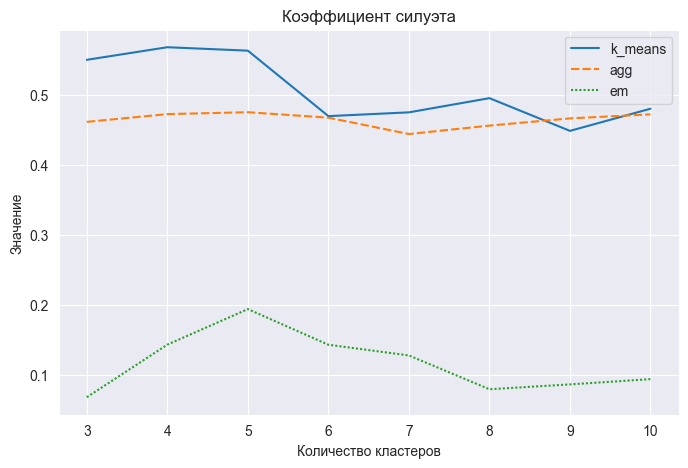

In [139]:
#кластеризуем
cluster_func(df=rfmq_pipe, cluster_list=list(range(3,11)))

#Лучшим всё также оказался KMeans с четырьмя кластерами

In [141]:
#Предсказание меток кластеров
#инициируем алгоритм
k_means4q =  KMeans(n_clusters=4, random_state=42)

#Копируем очищенный df c признаками признаками, добавляем метки классов
rfmq_predicted = cleaned_rfmq
rfmq_predicted['cluster'] = k_means4q.fit(rfmq_pipe).labels_
rfmq_predicted['cluster'] = rfmq_predicted['cluster']+1
rfmq_predicted

,Frequency,Monetary,Quantity,Recency,cluster
CustomerID,,,,,
12346,1,0.00,74215.000000,325,4
12347,182,4310.00,13.505495,2,1
12348,27,1437.24,86.370370,75,1
12349,72,1457.55,8.750000,18,1
12350,16,294.40,12.250000,310,3
...,...,...,...,...,...
18278,9,173.90,7.333333,73,1
18280,10,180.60,4.500000,277,3
18281,7,80.82,7.714286,180,3


In [142]:
#Группируем
rfmq_predicted_grouped = rfmq_predicted.groupby(by=['cluster']).agg(['mean'])
rfmq_predicted_grouped.columns = ['Frequency', 'Monetary','Quantity','Recency']
rfmq_predicted_grouped

,Frequency,Monetary,Quantity,Recency
cluster,,,,
1,61.963428,1252.051747,16.520093,65.767270
2,106.701107,603.216790,3.612398,57.776753
3,14.639321,190.752419,11.230550,250.442716
4,2.250000,574.739423,2485.660256,137.403846


In [148]:
plot_cluster_profile(rfmq_predicted_grouped, n_clusters=4)

In [145]:
#распределение количества клиентов по кластерам
rfmq_predicted['cluster'].value_counts(normalize=True) * 100

1    67.539920
3    17.639721
2    13.522954
4     1.297405
Name: cluster, dtype: float64

#### Вывод:
При небольшом снижении коэффициента силуэта и добавлении новой размерности удалось выделить отдельный кластер "оптовиков", который покупают большое количество товара.

Общая характеристика кластеров теперь будет выглядеть следующим образом:

* Кластер 0 - больше всех тратят, средняя частота покупок, среднее количество товара в покупке, короткая длительность срока от последней покупки ("лояльные" - около 67% от общего числа покупателей)
* Кластер 1 - средний объем трат, высокая частота покупок, среднее количество товара в покупке, короткая длительность срока от последней покупки ("перспективные" - около 13% от общего числа покупателей)
* Кластер 2 - меньше всех тратят, низкая частота покупок, среднее количество товара в покупке, максимальная длительность срока от последней покупки ("спящие" - около 17% от общего числа покупателей)
* Кластер 3 - средний объем трат, низкая частота покупок, больше всех покупают по количеству, средняя длительность срока от последней покупки ("оптовики" - около 1%)